In [12]:
import pandas as pd
import requests
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [13]:
url = "https://raw.githubusercontent.com/robert456456456456/Web_server_log_parser/master/devops.log"

In [14]:
content = requests.get(url)
data = (content.content.decode('UTF-8'))
data = data.split("\r\n")
data.pop()
del data[906]

In [15]:
def filter(l):
    ip = l.split(" - - [",1)[0]
    l = l.split(" - - [",1)[1]
    time = l.split(" ",1)[0]
    l = l.split(" ",1)[1]
    offset = l.split("] ",1)[0]
    l = l.split('] "',1)[1]
    action = l.split(' HTTP/1.')[0]
    l = l.split(' HTTP/1.')[1]
    l = l.split('" ')[1]
    retcode = l.split(" ",1)[0]
    size = l.split(" ",1)[1]
    return [ip,time,offset,action,retcode,size]

In [16]:
cleaned_data = []
for i,j in enumerate(data):
    cleaned_data.append(filter(j))

### Fetching the geo location using function get_location

In [17]:
def get_location(ip):
    response = requests.get("https://geolocation-db.com/json/{}&position=true".format(ip)).json()
    return response['country_name'],response['city'],response['state']

In [18]:
array = np.array(cleaned_data)
ips = array[:,0]

In [8]:
start = time.time()
country = []
state = []
city = []
for j,i in enumerate(ips):
    co,ci,s = get_location(i)
    country.append(co)
    city.append(ci)
    state.append(s)
print("time taken: ",time.time()-start)

time taken:  1113.8698749542236


In [9]:
co = country.copy()

In [10]:
for i,j in enumerate(co):
    if j == "Not found":
        co[i] = "Unknown"
        #ci[i] = "Unknown"
        #s[i] = "Unknown"

In [11]:
df = pd.DataFrame(cleaned_data,columns=["ip","date/time","GMT_offset","action","return_code","size"])
df['Country'] = co
df.head(7)

,ip,date/time,GMT_offset,action,return_code,size,Country
0,64.242.88.10,07/Mar/2004:16:05:49,-0800,GET /twiki/bin/edit/Main/Double_bounce_sender?...,401,12846,United States
1,64.242.88.10,07/Mar/2004:16:06:51,-0800,GET /twiki/bin/rdiff/TWiki/NewUserTemplate?rev...,200,4523,United States
2,64.242.88.10,07/Mar/2004:16:10:02,-0800,GET /mailman/listinfo/hsdivision,200,6291,United States
3,64.242.88.10,07/Mar/2004:16:11:58,-0800,GET /twiki/bin/view/TWiki/WikiSyntax,200,7352,United States
4,64.242.88.10,07/Mar/2004:16:20:55,-0800,GET /twiki/bin/view/Main/DCCAndPostFix,200,5253,United States
5,64.242.88.10,07/Mar/2004:16:23:12,-0800,GET /twiki/bin/oops/TWiki/AppendixFileSystem?t...,200,11382,United States
6,64.242.88.10,07/Mar/2004:16:24:16,-0800,GET /twiki/bin/view/Main/PeterThoeny,200,4924,United States


# Top 5 visited users

In [49]:
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

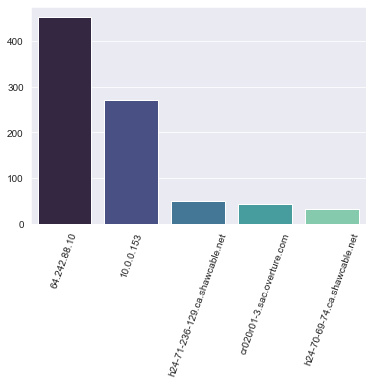

In [83]:
sns.barplot(df.ip.value_counts().index[:5],df.ip.value_counts().values[:5],palette="mako")
plt.xticks(rotation=70)

In [84]:
name = (df.ip.value_counts())

In [85]:
name.head(5)

64.242.88.10                       452
10.0.0.153                         270
h24-71-236-129.ca.shawcable.net     51
cr020r01-3.sac.overture.com         44
h24-70-69-74.ca.shawcable.net       32
Name: ip, dtype: int64

# Top 5 visited pages

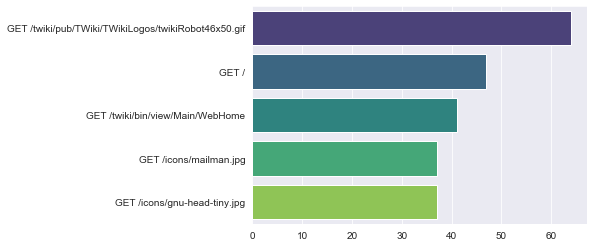

In [86]:
sns.barplot(df.action.value_counts().values[:5],df.action.value_counts().index[:5],palette="viridis")

In [87]:
page  = df.action.value_counts()

In [88]:
page.head(5)

GET /twiki/pub/TWiki/TWikiLogos/twikiRobot46x50.gif    64
GET /                                                  47
GET /twiki/bin/view/Main/WebHome                       41
GET /icons/mailman.jpg                                 37
GET /icons/gnu-head-tiny.jpg                           37
Name: action, dtype: int64

# Plotting graph according to user geo location

In [106]:
sns.countplot?

In [120]:
custom_style = {'axes.labelcolor': 'black',
                'xtick.color': 'black',
                'ytick.color': 'black'}
sns.set_style("darkgrid", rc=custom_style)

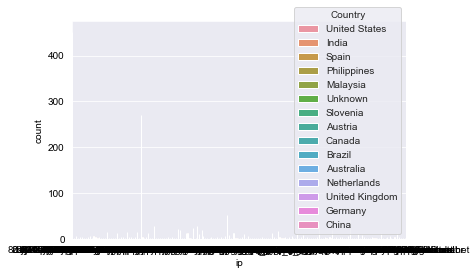

In [122]:
sns.countplot(df.ip,hue = df.Country)